In [39]:
import pandas as pd

SP500 = pd.read_csv(r"D:\^GSPC_S&P500.csv", header = 0, parse_dates=['Date'])
NASDAQ = pd.read_csv(r"D:\^IXIC_NASDAQComposite.csv", header = 0, parse_dates=['Date'])
Dowjoes = pd.read_csv(r"D:\^DJI_DowJonesIndustrialAverage.csv", header = 0, parse_dates=['Date'])

# rename for Adj Close column in each dataframes
SP500 = SP500.rename(index=str, columns={"Adj Close":"SP500_adj"})
NASDAQ = NASDAQ.rename(index=str, columns={"Adj Close":"NASDAQ_adj"})
Dowjoes = Dowjoes.rename(index=str, columns={"Adj Close":"Dowjoes_adj"})

import pandas as pd
import matplotlib.pyplot as plt

bitcoin_data = pd.read_csv(r"D:\bitcoin_dataset.csv", header=0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data.head(3)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Year,Month
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0,2010,2
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0,2010,2
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0,2010,2


In [40]:
# merge the bitcoin data and stock price data

from functools import reduce


dfs = [bitcoin_data, SP500, NASDAQ, Dowjoes]
merge = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(merge.shape)
merge.head(5)

(2013, 44)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,Low_y,Close_y,NASDAQ_adj,Volume_y,Open,High,Low,Close,Dowjoes_adj,Volume
0,2010-02-23,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,2205.699951,2213.439941,2213.439941,2310910000,10383.160156,10411.120117,10267.830078,10282.410156,10282.410156,190740000
1,2010-02-24,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,2221.280029,2235.899902,2235.899902,2155810000,10284.000000,10393.509766,10283.929688,10374.160156,10374.160156,181450000
2,2010-02-25,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,2198.729980,2234.219971,2234.219971,2300530000,10366.599609,10366.679688,10185.830078,10321.030273,10321.030273,242550000
3,2010-02-26,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,2222.229980,2238.260010,2238.260010,2283430000,10321.410156,10353.450195,10272.290039,10325.259766,10325.259766,282120000
4,2010-03-01,0.0,2162150.0,0.0,0.0,0.0,0.000228,0.0,1.0,0.0,...,2247.330078,2273.570068,2273.570068,2504940000,10326.099609,10413.990234,10326.099609,10403.790039,10403.790039,173750000


In [41]:
# Normalize the bitcoin market price and S&Q 500 stock price


merge['normalized_btc_market_price'] = (merge['btc_market_price'] - merge['btc_market_price'].mean()) / (merge['btc_market_price'].max() - merge['btc_market_price'].min())
merge['normalized_SP500'] = (merge['SP500_adj'] - merge['SP500_adj'].mean()) / (merge['SP500_adj'].max() - merge['SP500_adj'].min())
merge['normalized_NASDAQ'] = (merge['NASDAQ_adj'] - merge['NASDAQ_adj'].mean()) / (merge['NASDAQ_adj'].max() - merge['NASDAQ_adj'].min())
merge['normalized_Dowjoes'] = (merge['Dowjoes_adj'] - merge['Dowjoes_adj'].mean()) / (merge['Dowjoes_adj'].max() - merge['Dowjoes_adj'].min())


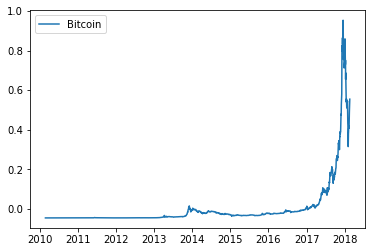

In [42]:
#plt.plot(merge['Date'], merge['normalized_btc_market_price'])
plt.plot(merge['Date'], merge['normalized_btc_market_price'])


#plt.legend(['Bitcoin'], loc='upper left')
plt.legend(['Bitcoin'])

plt.show()

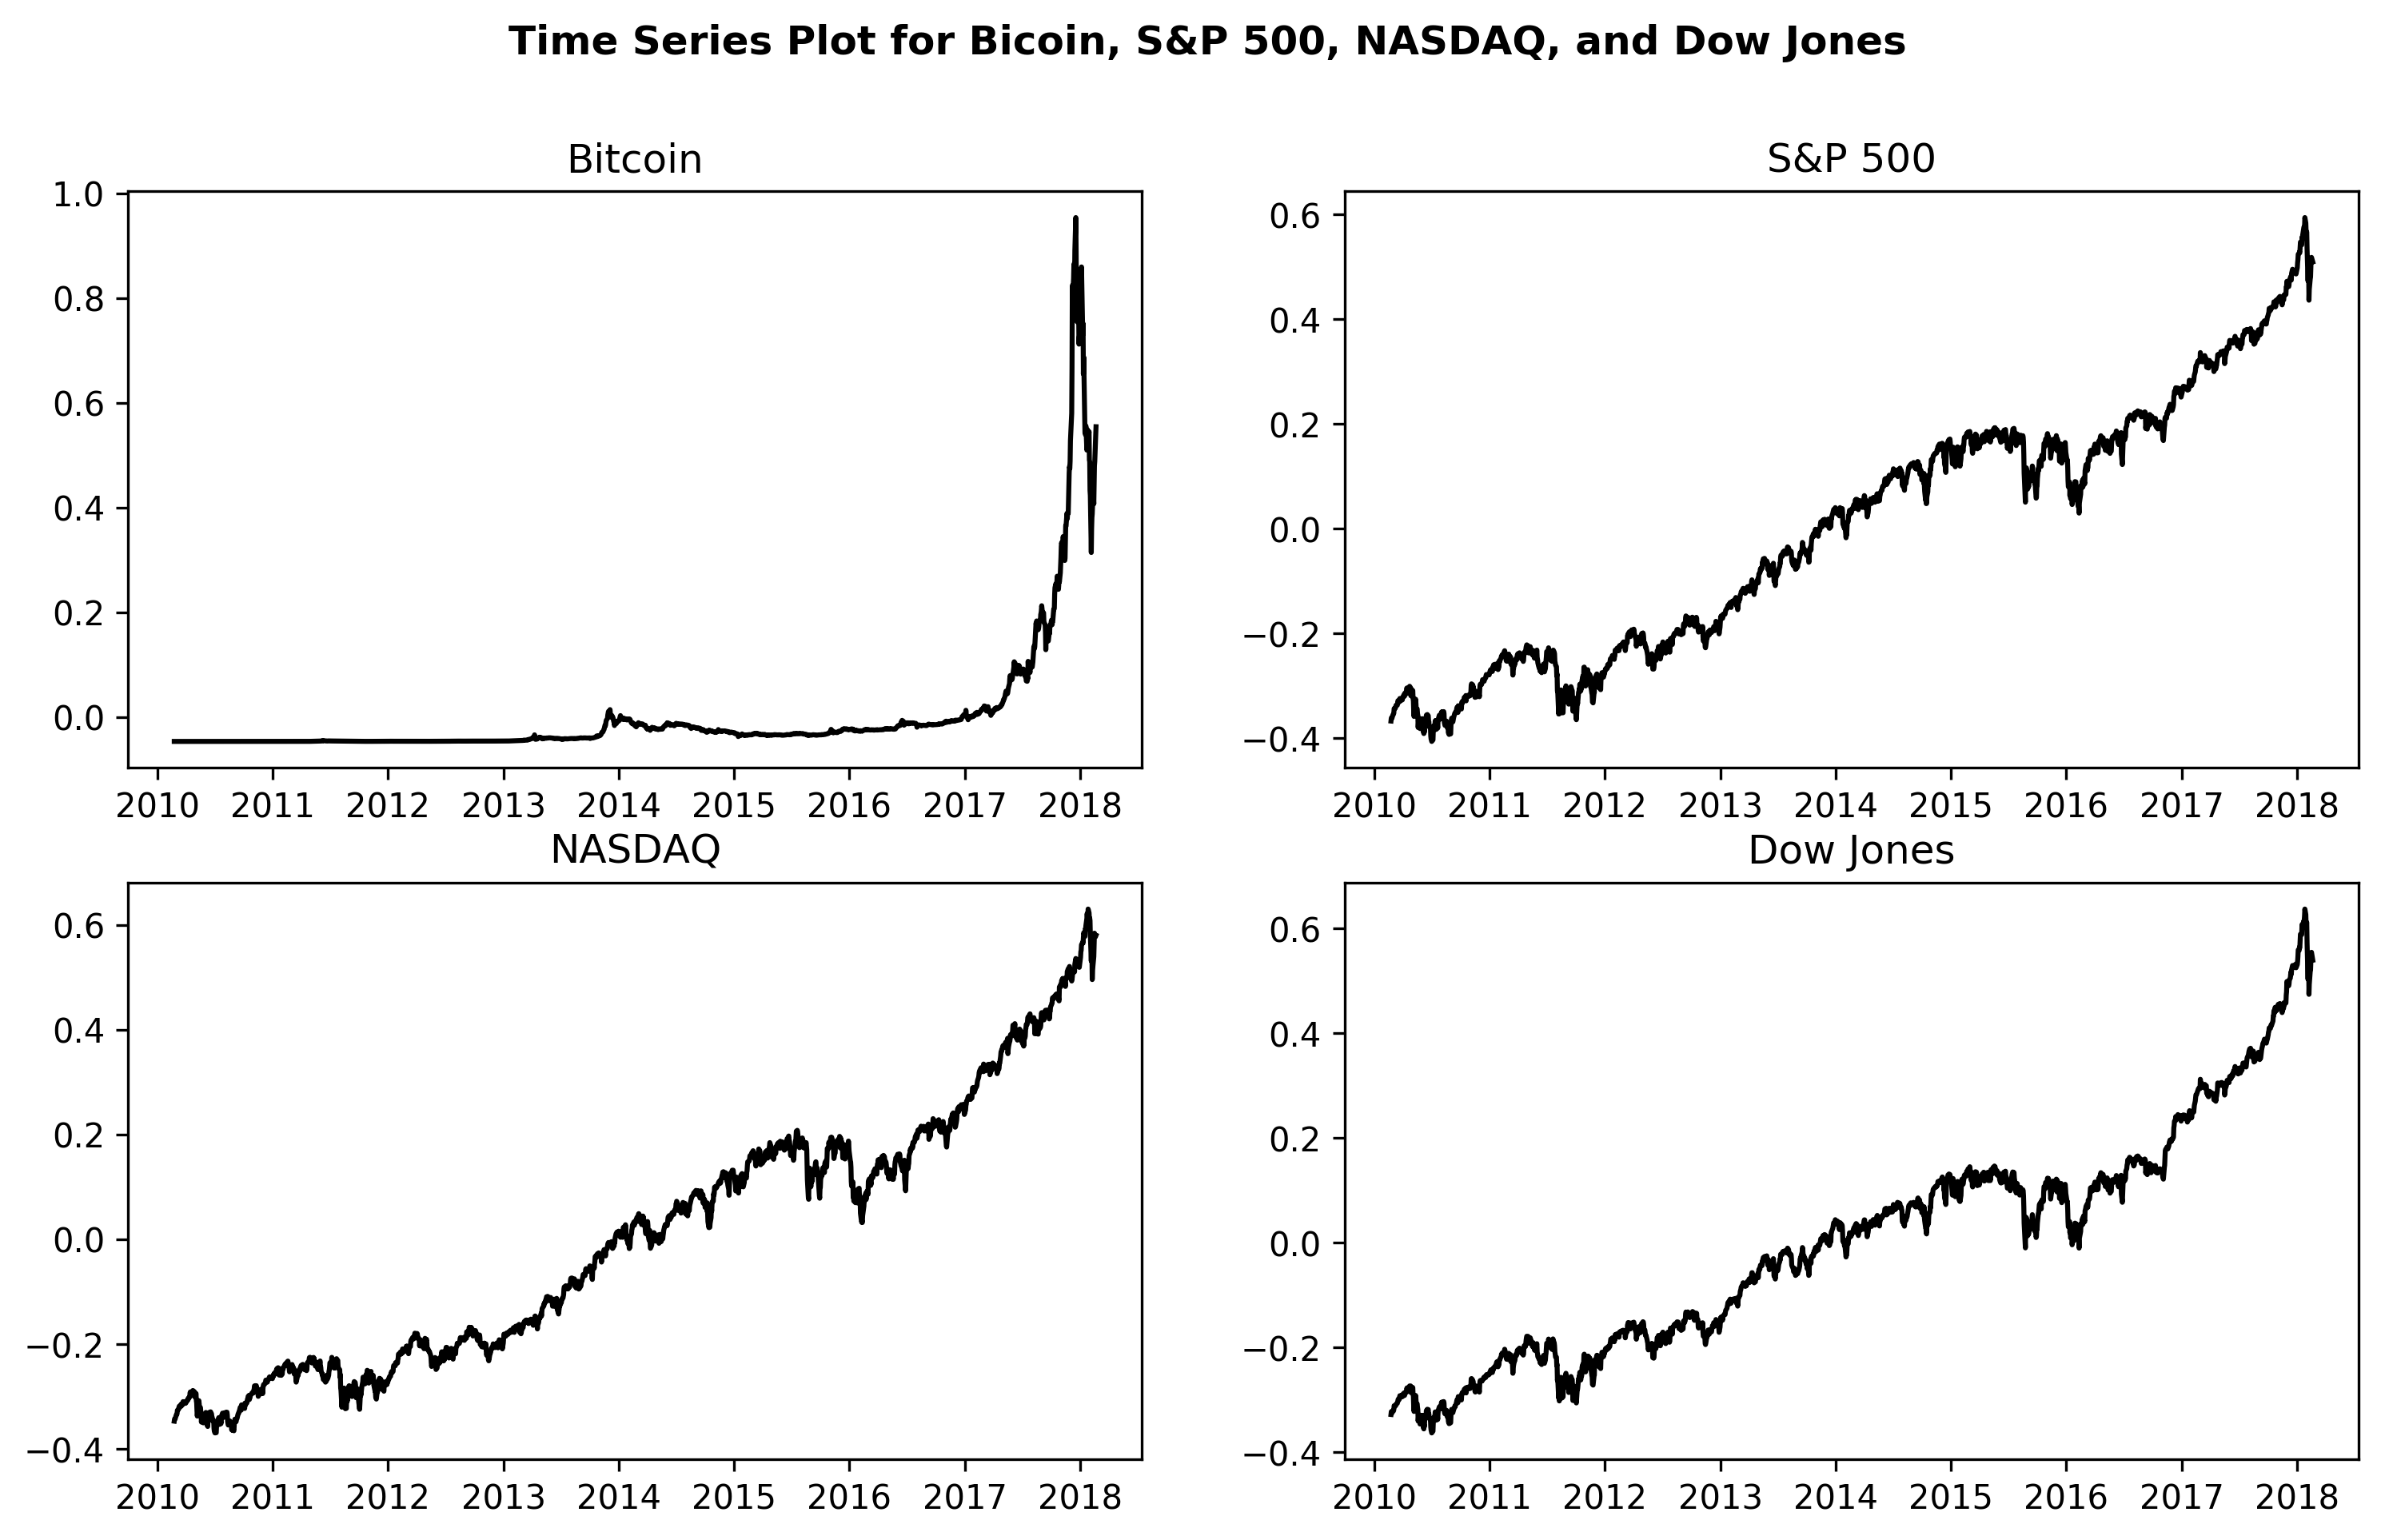

In [45]:
import PIL

fig = plt.figure(figsize=(12, 7), dpi = 300)
#plt.title('Time Series Plots for Bitcoin, S&P 500, NASDAQ, and Dow Jones')
sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Bitcoin') # non OOP: plt.title('The function f')
sub1.plot(merge['Date'], merge['normalized_btc_market_price'], color = 'k')
sub2 = fig.add_subplot(222)
sub2.set_title('S&P 500')
sub2.plot(merge['Date'], merge['normalized_SP500'], color = 'k')
sub3 = fig.add_subplot(223)
sub3.set_title('NASDAQ')
sub3.plot(merge['Date'], merge['normalized_NASDAQ'], color = 'k')
sub4 = fig.add_subplot(224)
sub4.set_title('Dow Jones')
sub4.plot(merge['Date'], merge['normalized_Dowjoes'], color = 'k')
#plt.plot(t, g(t))
#plt.tight_layout()
plt.suptitle('Time Series Plot for Bicoin, S&P 500, NASDAQ, and Dow Jones', fontweight='bold')
plt.savefig(r"D:\fig1.tif")
plt.show()

In [122]:
# bitcoin peak date

max = merge['btc_market_price'].max()
merge['Date'][1970]

Timestamp('2017-12-18 00:00:00')

In [121]:
list(merge['btc_market_price']).index(max)

1970

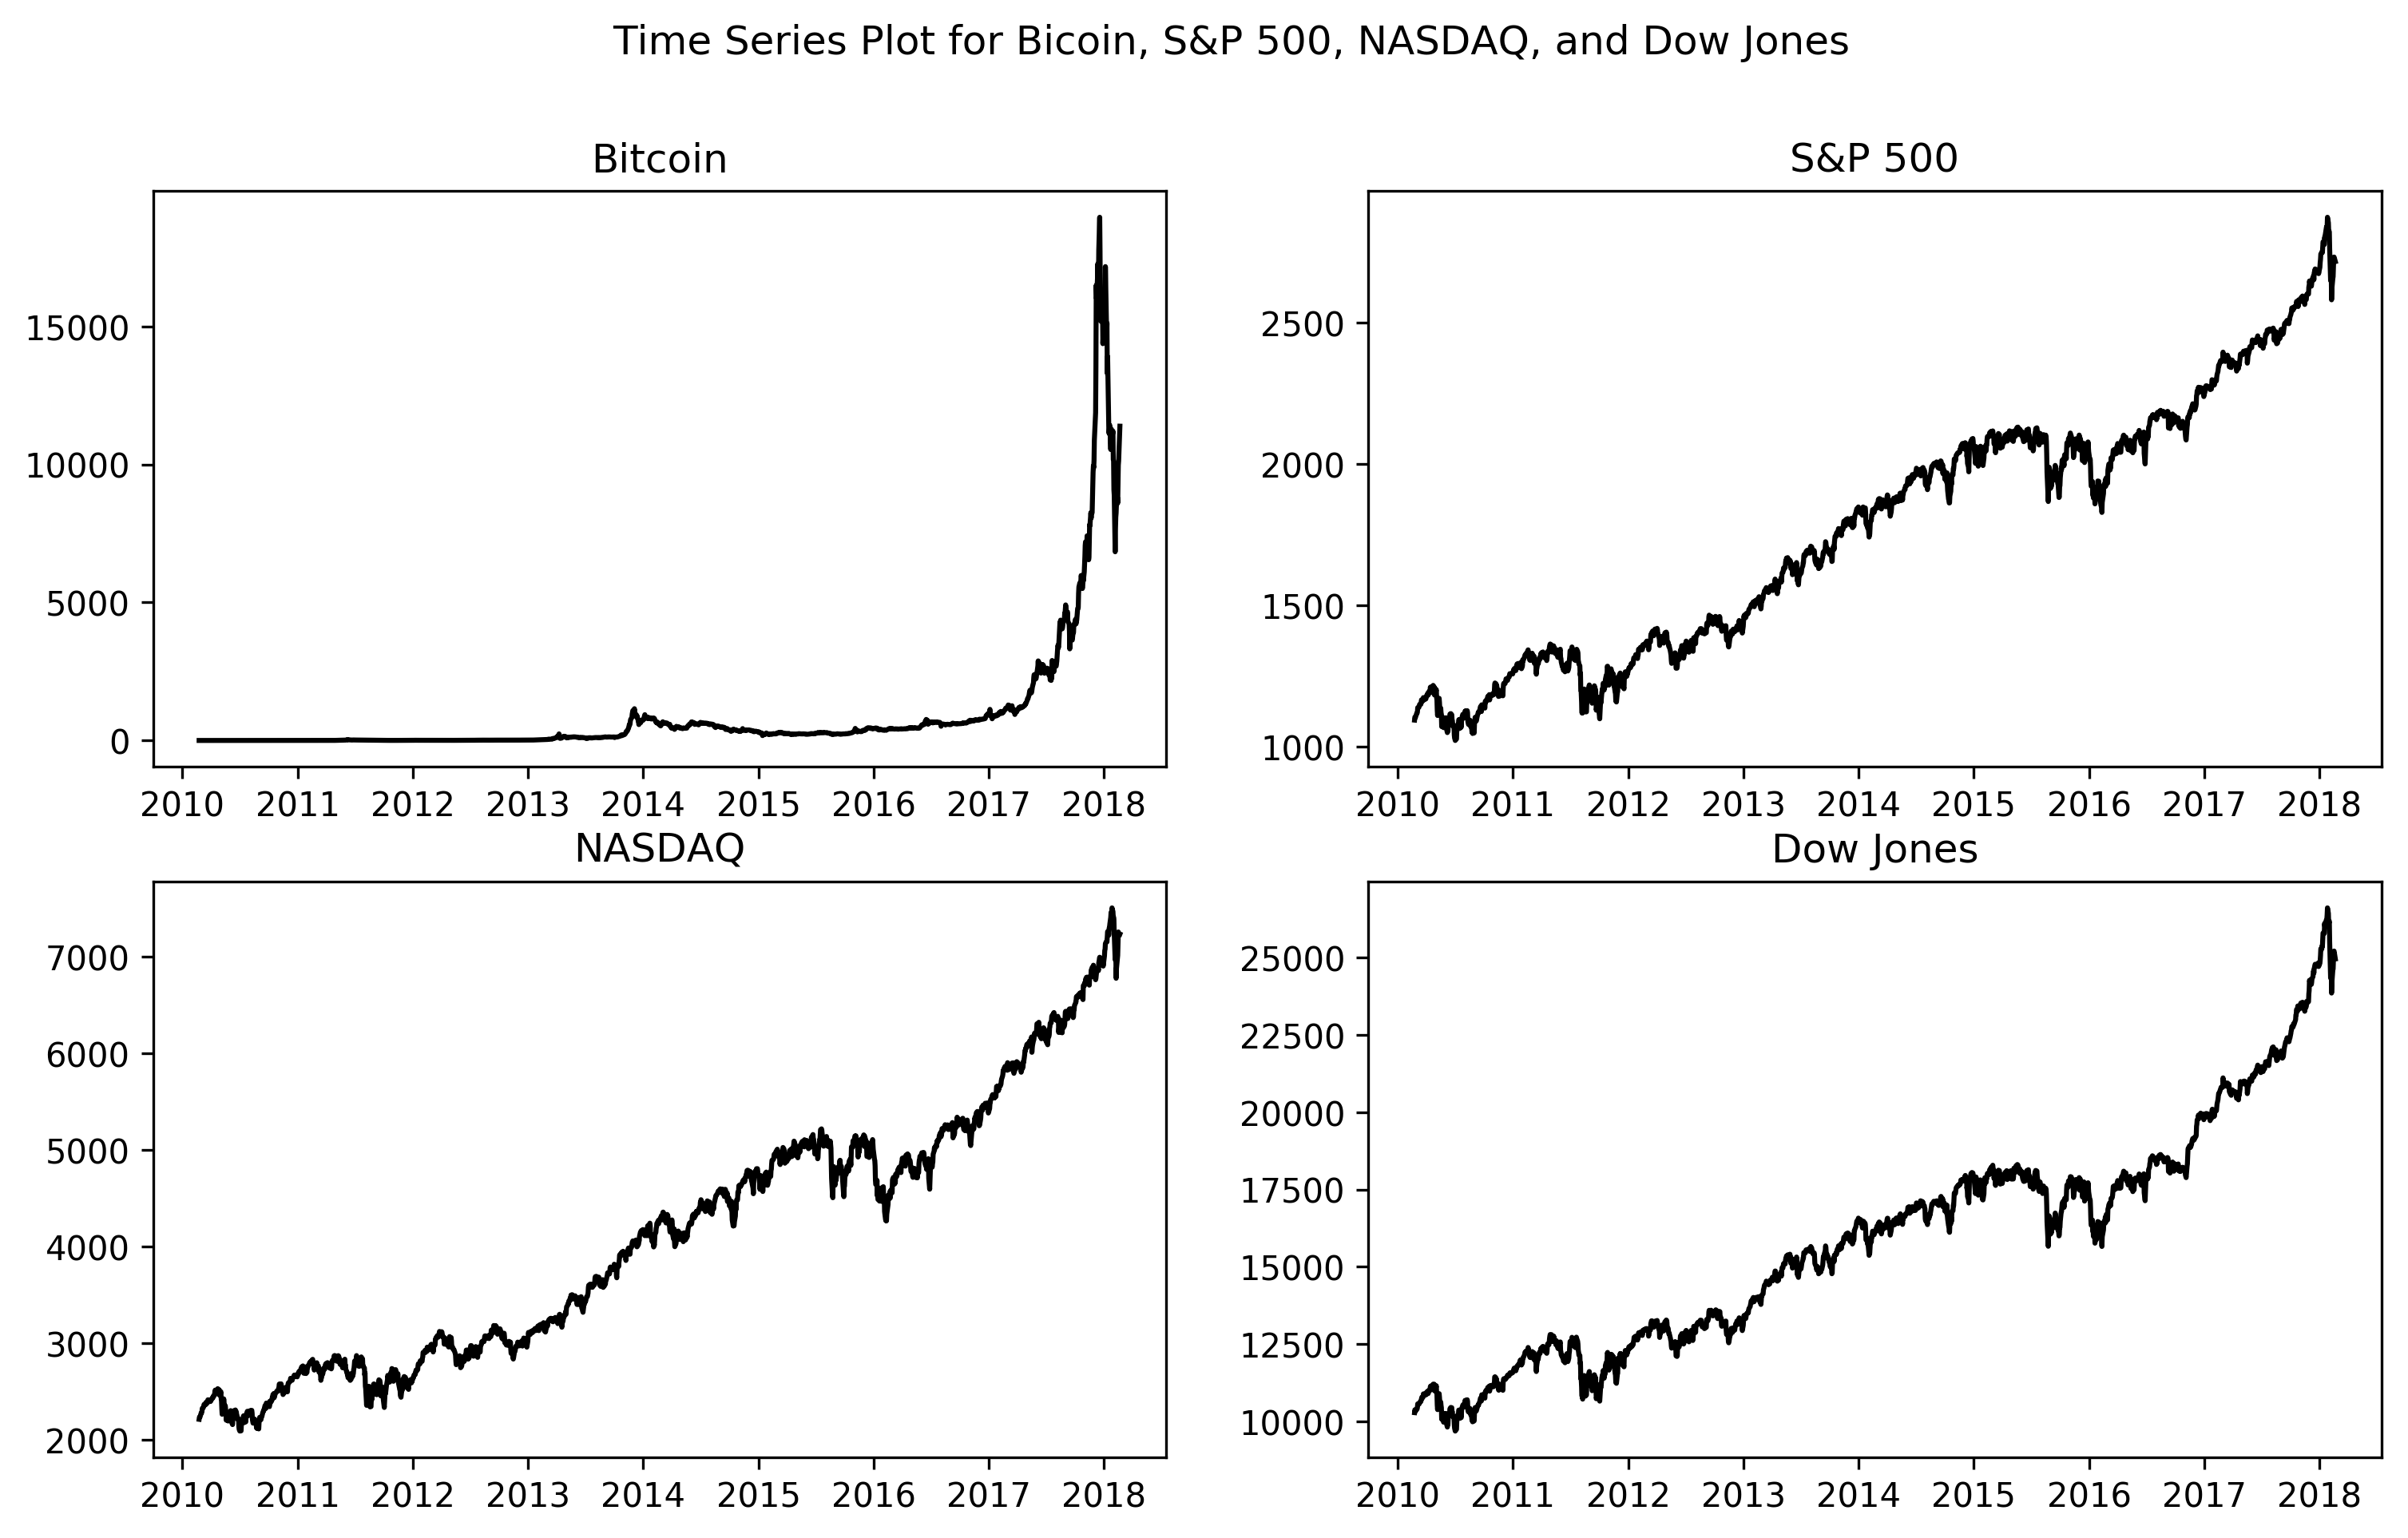

In [22]:
# using original not normalized


fig = plt.figure(figsize=(12, 7), dpi = 300)
sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Bitcoin') # non OOP: plt.title('The function f')
sub1.plot(merge['Date'], merge['btc_market_price'], color = 'k')
sub2 = fig.add_subplot(222)
sub2.set_title('S&P 500')
sub2.plot(merge['Date'], merge['SP500_adj'], color = 'k')
sub3 = fig.add_subplot(223)
sub3.set_title('NASDAQ')
sub3.plot(merge['Date'], merge['NASDAQ_adj'], color = 'k')
sub4 = fig.add_subplot(224)
sub4.set_title('Dow Jones')
sub4.plot(merge['Date'], merge['Dowjoes_adj'], color = 'k')
#plt.plot(t, g(t))
#plt.tight_layout()
fig.suptitle('Time Series Plot for Bicoin, S&P 500, NASDAQ, and Dow Jones')
#plt.savefig(r"D:\timeseries-org.tif")
plt.show()

In [46]:
btdata = pd.DataFrame({'btc_market_price':merge['normalized_btc_market_price'],'SP500':merge['normalized_SP500'],'NASDAQ':
                      merge['normalized_NASDAQ'],'Dowjoes':merge['normalized_Dowjoes']})
btdata.index = pd.DatetimeIndex(merge['Date'])
btdata.head(5)

,Dowjoes,NASDAQ,SP500,btc_market_price
Date,,,,
2010-02-23,-0.327972,-0.347311,-0.367013,-0.046564
2010-02-24,-0.322553,-0.343162,-0.361262,-0.046564
2010-02-25,-0.325691,-0.343472,-0.362505,-0.046564
2010-02-26,-0.325441,-0.342726,-0.361667,-0.046564
2010-03-01,-0.320803,-0.336204,-0.355603,-0.046564


In [47]:
import numpy as np

# To calculate log return
btdata['shift_btc_market_price'] = btdata['btc_market_price'].shift(-1)
btdata['shift_SP500'] = btdata['SP500'].shift(-1)
btdata['shift_NASDAQ'] = btdata['NASDAQ'].shift(-1)
btdata['shift_Dowjoes'] = btdata['Dowjoes'].shift(-1)

# Calculate the log return for stock price and bitcoin market price
btdata['ln_return_btc_market_price'] = np.log(btdata['shift_btc_market_price']/btdata['btc_market_price'])
btdata['ln_return_SP500'] = np.log(btdata['shift_SP500']/btdata['SP500'])
btdata['ln_return_NASDAQ'] = np.log(btdata['shift_NASDAQ']/btdata['NASDAQ'])
btdata['ln_return_Dowjoes'] = np.log(btdata['shift_Dowjoes']/btdata['Dowjoes'])
btdata.tail(3)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


,Dowjoes,NASDAQ,SP500,btc_market_price,shift_btc_market_price,shift_SP500,shift_NASDAQ,shift_Dowjoes,ln_return_btc_market_price,ln_return_SP500,ln_return_NASDAQ,ln_return_Dowjoes
Date,,,,,,,,,,,,
2018-02-15,0.553171,0.584165,0.517497,0.479605,0.487516,0.518049,0.581032,0.554294,0.016360,0.001065,-0.005377,0.002028
2018-02-16,0.554294,0.581032,0.518049,0.487516,0.554136,0.509423,0.580079,0.539254,0.128086,-0.016790,-0.001642,-0.027509
2018-02-20,0.539254,0.580079,0.509423,0.554136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Extract ln return data for bitcoin market price and stock price
# Remove missing value and infinite value

data = btdata.loc[:,['ln_return_SP500','ln_return_NASDAQ','ln_return_Dowjoes','ln_return_btc_market_price']]
data = data.rename(index=str, columns={"ln_return_SP500":"SP500","ln_return_NASDAQ":"NASDAQ","ln_return_Dowjoes":"Dowjoes",
                                      "ln_return_btc_market_price":"Bitcoin"})
data = data.replace([np.inf, -np.inf], np.nan).dropna()
data.head(5)

,SP500,NASDAQ,Dowjoes,Bitcoin
Date,,,,
2010-02-23 00:00:00,-0.015792,-0.012017,-0.016662,0.0
2010-02-24 00:00:00,0.003435,0.000904,0.009682,0.0
2010-02-25 00:00:00,-0.002314,-0.002175,-0.000767,0.0
2010-02-26 00:00:00,-0.016909,-0.019213,-0.014355,0.0
2010-03-01 00:00:00,-0.003960,-0.003974,-0.000403,0.0


In [49]:
data_SP500 = data.loc[:,['SP500']]
data_SP500.to_csv("SP500.csv")

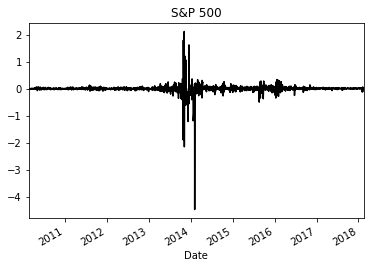

In [50]:
from pandas import Series
from matplotlib import pyplot
series1 = Series.from_csv('SP500.csv', header=0)
series1.plot(color = 'k')
pyplot.title('S&P 500')
pyplot.show()

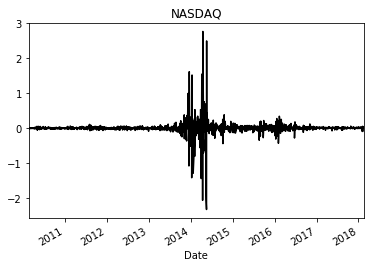

In [51]:
data_SP500 = data.loc[:,['NASDAQ']]
data_SP500.to_csv("NASDAQ.csv")

series2 = Series.from_csv('NASDAQ.csv', header=0)
series2.plot(color = 'k')
pyplot.title('NASDAQ')
pyplot.show()

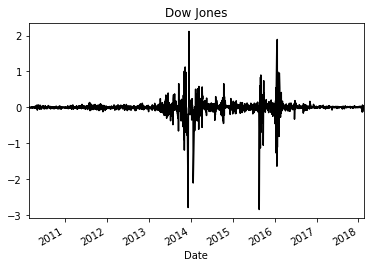

In [52]:
data_SP500 = data.loc[:,['Dowjoes']]
data_SP500.to_csv("Dowjones.csv")

series3 = Series.from_csv('Dowjones.csv', header=0)
series3.plot(color = 'k')
pyplot.title('Dow Jones')
pyplot.show()

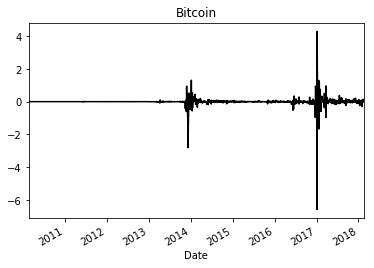

In [53]:
data_SP500 = data.loc[:,['Bitcoin']]
data_SP500.to_csv("Bitcoin.csv")

series4 = Series.from_csv('Bitcoin.csv', header=0)
series4.plot(color = 'k')
pyplot.title('Bitcoin')
pyplot.show()

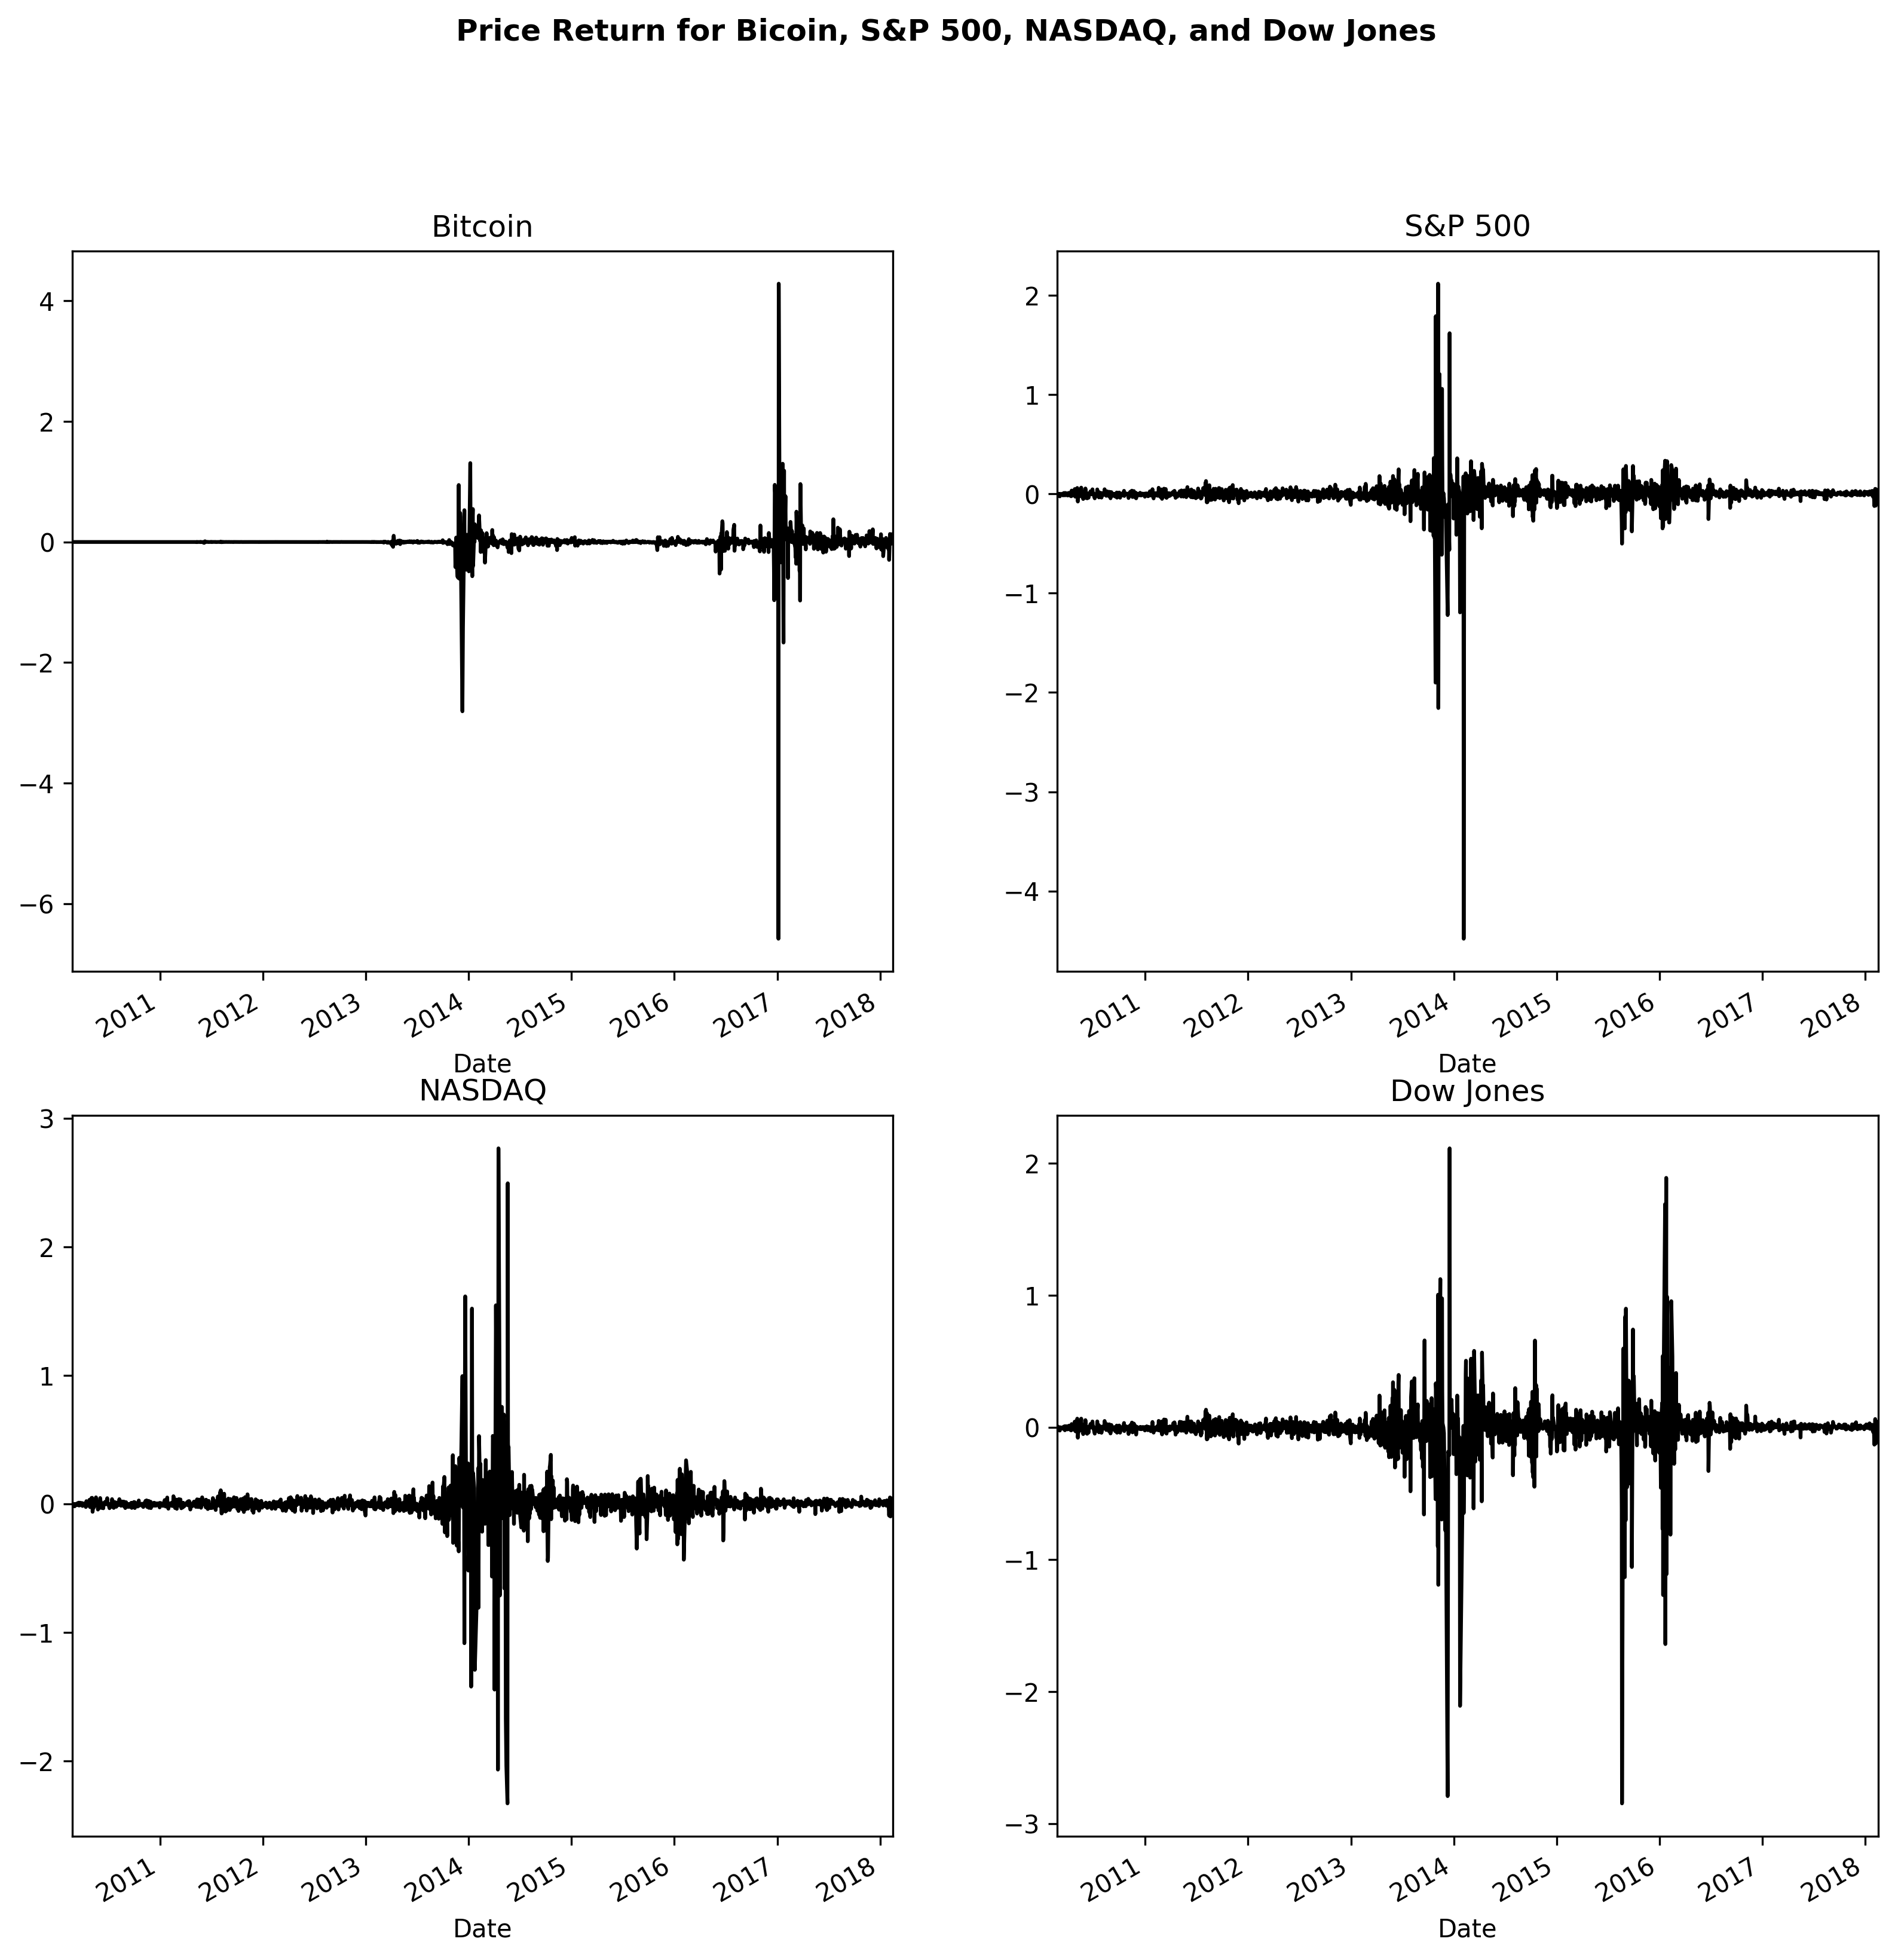

In [56]:
fig = plt.figure(figsize=(13, 13), dpi = 300)
sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Bitcoin') # non OOP: plt.title('The function f')
series4.plot(color = 'k')
sub2 = fig.add_subplot(222)
sub2.set_title('S&P 500')
series1.plot(color = 'k')
sub3 = fig.add_subplot(223)
sub3.set_title('NASDAQ')
series2.plot(color = 'k')
sub4 = fig.add_subplot(224)
sub4.set_title('Dow Jones')
series3.plot(color = 'k')
#plt.plot(t, g(t))
#plt.tight_layout()
#plt.savefig('ln_4_graph')
fig.suptitle('Price Return for Bicoin, S&P 500, NASDAQ, and Dow Jones', fontweight='bold')
#plt.tight_layout()
plt.savefig(r"D:\fig2.tif")
plt.show()